PROBABILISTIC FACTOR PROFILES ANALYSIS
✅ Loaded probabilistic factors shape: (3, 43)
PROBABILISTIC FACTOR PROFILE STATISTICS

Factor_1:
  Sum: 1.000000 (should be ~1.0)
  Concentration: 0.003 (0=uniform, 1=focused)
  Dominant species: m/Q 31 (0.033)
  Min contribution: 0.018281
  Max contribution: 0.032756

Factor_2:
  Sum: 1.000000 (should be ~1.0)
  Concentration: 0.017 (0=uniform, 1=focused)
  Dominant species: m/Q 50 (0.038)
  Min contribution: 0.010942
  Max contribution: 0.038038

Factor_3:
  Sum: 1.000000 (should be ~1.0)
  Concentration: 0.012 (0=uniform, 1=focused)
  Dominant species: m/Q 74 (0.040)
  Min contribution: 0.012093
  Max contribution: 0.040349

Overall Statistics:
  All factors sum to 1.0: True
  Average concentration: 0.011


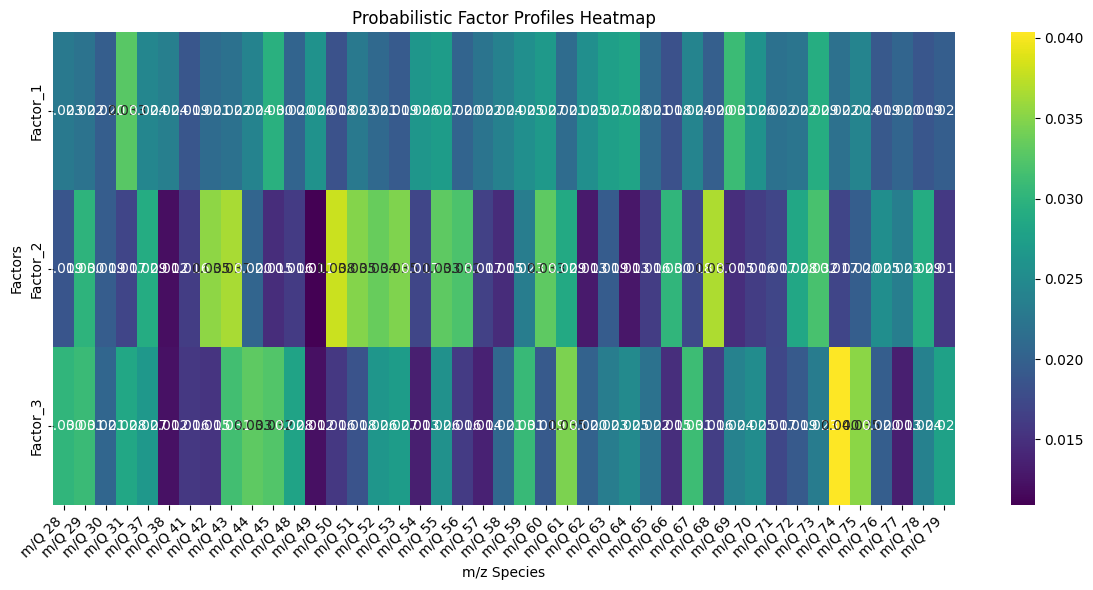

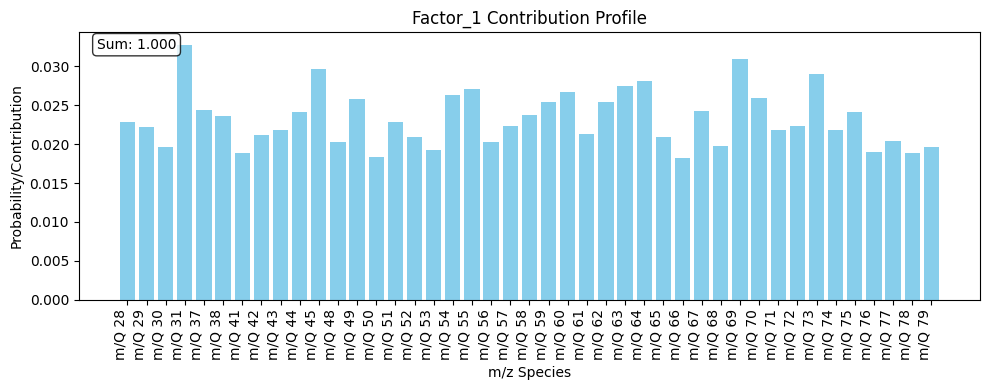

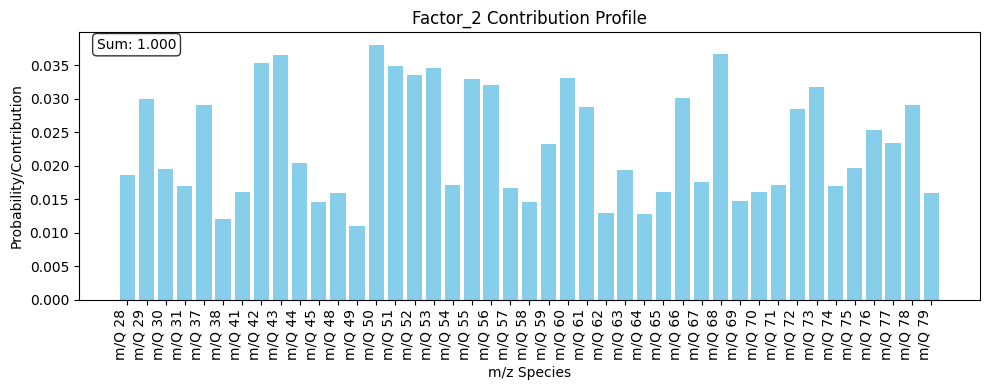

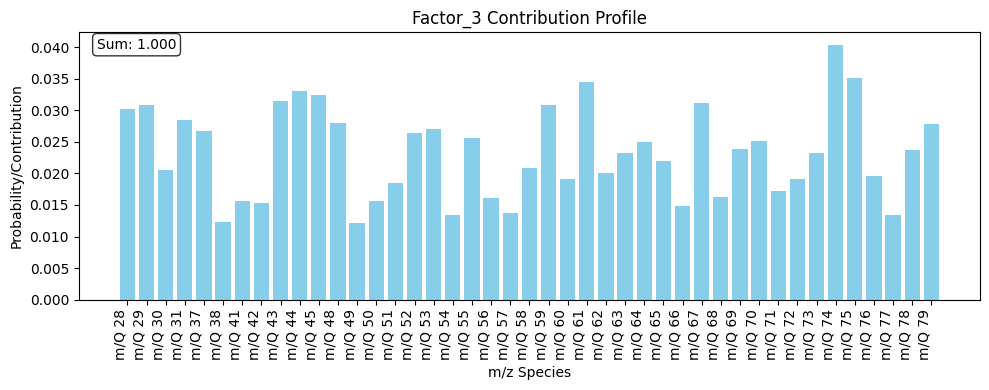

In [2]:
# In test.ipynb - Updated for Probabilistic Factor Profiles

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import importlib

# Force reload the visualization module to get the latest version
if 'src.visualisation' in sys.modules:
    importlib.reload(sys.modules['src.visualisation'])

# Import your visualization functions
from src.visualisation import (
    plot_weight_heatmap, 
    plot_bar_chart_for_factor, 
    plot_comparison, 
    plot_difference_and_ratio,
    load_and_plot_probabilistic_factors
)

# ============================================================================
# NEW: Load and Visualize Probabilistic Factor Profiles
# ============================================================================

print("=" * 80)
print("PROBABILISTIC FACTOR PROFILES ANALYSIS")
print("=" * 80)

# Load the new probabilistic factor profiles
try:
    probabilistic_factors = np.load('saved_models/probabilistic_factors.npy')
    print(f"✅ Loaded probabilistic factors shape: {probabilistic_factors.shape}")
    
    # Use the new probabilistic factor visualization function
    # This will dynamically extract feature names from the CSV file
    load_and_plot_probabilistic_factors(
        factors_path='saved_models/probabilistic_factors.npy',
        data_csv='data/raw/Spectra_Abhin_reduced.csv',
        plot_heatmap=True,
        plot_bars=True,
        plot_statistics=True
    )
    
except FileNotFoundError:
    print("❌ Probabilistic factors not found. Using legacy linear weights...")
    
    # Fallback to legacy linear weights
    W_loaded = np.load('saved_models/linear_weights.npy')
    print("Loaded legacy weight matrix shape:", W_loaded.shape)
    
    # Dynamically extract feature names from CSV (excluding 'Time' column)
    df = pd.read_csv('data/raw/Spectra_Abhin_reduced.csv')
    feature_names = [col for col in df.columns.tolist() if col != 'Time']
    
    # Construct labels based on the number of factors (rows) in W_loaded
    factor_labels = [f'Factor {i+1}' for i in range(W_loaded.shape[0])]
    
    # Use legacy visualization
    plot_weight_heatmap(W_loaded, feature_names, factor_labels, 
                       title="Legacy Linear Weights Heatmap")
    
    # Plot bar charts for each factor
    for i in range(W_loaded.shape[0]):
        plot_bar_chart_for_factor(W_loaded[i, :], feature_names, f"Factor {i+1} Contribution Profile")


PROBABILISTIC FACTOR PROFILES ANALYSIS
✅ Loaded probabilistic factors shape: (3, 43)
PROBABILISTIC FACTOR PROFILE STATISTICS

Factor_1:
  Sum: 1.000000 (should be ~1.0)
  Concentration: 0.003 (0=uniform, 1=focused)
  Dominant species: m/Q 31 (0.033)
  Min contribution: 0.018281
  Max contribution: 0.032756

Factor_2:
  Sum: 1.000000 (should be ~1.0)
  Concentration: 0.017 (0=uniform, 1=focused)
  Dominant species: m/Q 50 (0.038)
  Min contribution: 0.010942
  Max contribution: 0.038038

Factor_3:
  Sum: 1.000000 (should be ~1.0)
  Concentration: 0.012 (0=uniform, 1=focused)
  Dominant species: m/Q 74 (0.040)
  Min contribution: 0.012093
  Max contribution: 0.040349

Overall Statistics:
  All factors sum to 1.0: True
  Average concentration: 0.011


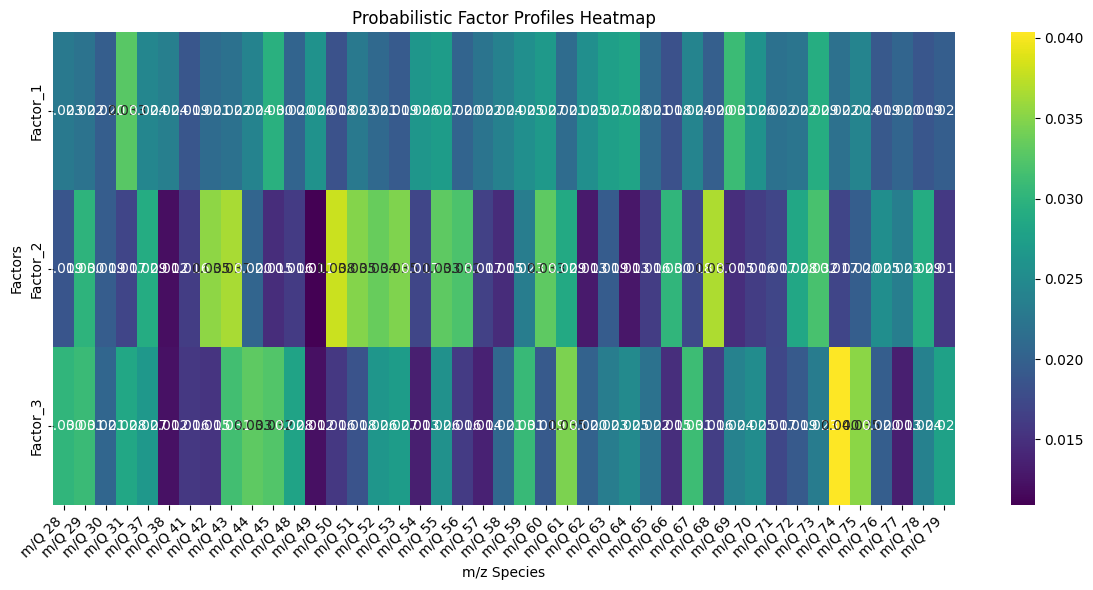

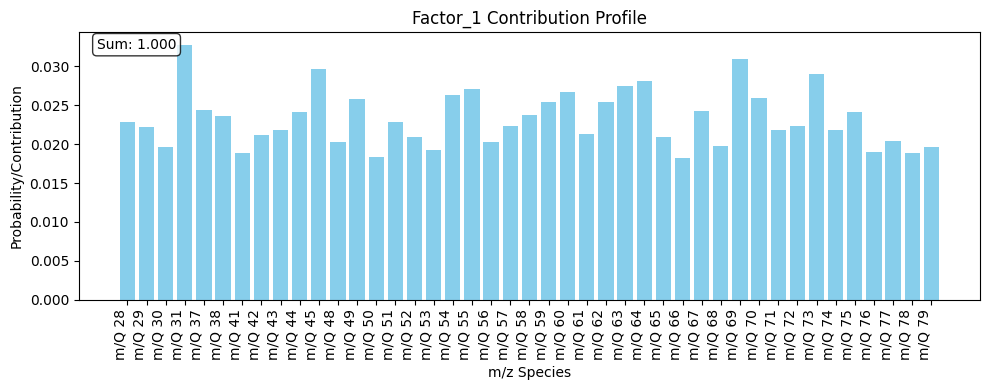

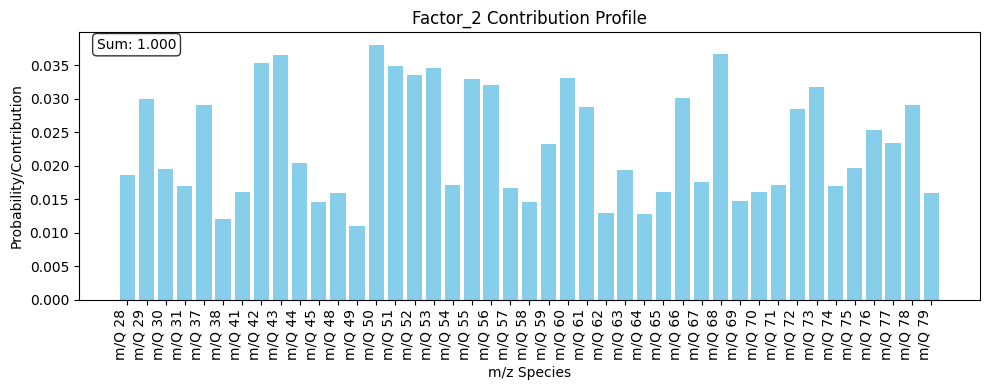

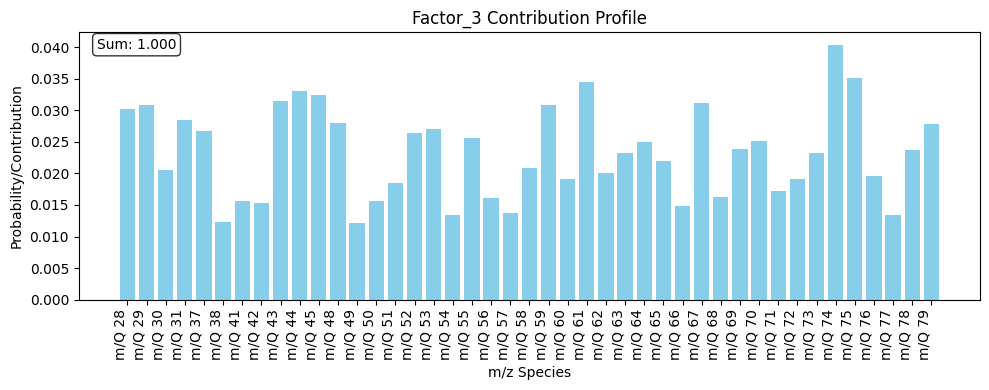

In [3]:
# In test.ipynb - Updated for Probabilistic Factor Profiles

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import importlib

# Force reload the visualization module to get the latest version
if 'src.visualisation' in sys.modules:
    importlib.reload(sys.modules['src.visualisation'])

# Import your visualization functions
from src.visualisation import (
    plot_weight_heatmap, 
    plot_bar_chart_for_factor, 
    plot_comparison, 
    plot_difference_and_ratio,
    load_and_plot_probabilistic_factors
)

# ============================================================================
# NEW: Load and Visualize Probabilistic Factor Profiles
# ============================================================================

print("=" * 80)
print("PROBABILISTIC FACTOR PROFILES ANALYSIS")
print("=" * 80)

# Load the new probabilistic factor profiles
try:
    probabilistic_factors = np.load('saved_models/probabilistic_factors.npy')
    print(f"✅ Loaded probabilistic factors shape: {probabilistic_factors.shape}")
    
    # Use the new probabilistic factor visualization function
    # This will dynamically extract feature names from the CSV file
    load_and_plot_probabilistic_factors(
        factors_path='saved_models/probabilistic_factors.npy',
        data_csv='data/raw/Spectra_Abhin_reduced.csv',
        plot_heatmap=True,
        plot_bars=True,
        plot_statistics=True
    )
    
except FileNotFoundError:
    print("❌ Probabilistic factors not found. Using legacy linear weights...")
    
    # Fallback to legacy linear weights
    W_loaded = np.load('saved_models/linear_weights.npy')
    print("Loaded legacy weight matrix shape:", W_loaded.shape)
    
    # Dynamically extract feature names from CSV (excluding 'Time' column)
    df = pd.read_csv('data/raw/Spectra_Abhin_reduced.csv')
    feature_names = [col for col in df.columns.tolist() if col != 'Time']
    
    # Construct labels based on the number of factors (rows) in W_loaded
    factor_labels = [f'Factor {i+1}' for i in range(W_loaded.shape[0])]
    
    # Use legacy visualization
    plot_weight_heatmap(W_loaded, feature_names, factor_labels, 
                       title="Legacy Linear Weights Heatmap")
    
    # Plot bar charts for each factor
    for i in range(W_loaded.shape[0]):
        plot_bar_chart_for_factor(W_loaded[i, :], feature_names, f"Factor {i+1} Contribution Profile")

In [7]:
# Comparative Visualization Code Block - Updated for Probabilistic Factors

# -------------------------
# 1. Load NMF Factor Profiles
# -------------------------
try:
    nmf_df = pd.read_csv("NMF_Factor_Profiles.csv", index_col=0)
    print("Shape of NMF factor profiles:", nmf_df.shape)
    print("Preview of NMF factor profiles:")
    display(nmf_df.head())

    # If the row index is just numeric (0, 1, 2), rename them for clarity:
    nmf_df.index = ["NMF_Factor1", "NMF_Factor2", "NMF_Factor3"]

    # -------------------------
    # 2. Load Autoencoder Factors (Probabilistic or Legacy)
    # -------------------------
    try:
        # Try to load probabilistic factors first
        probabilistic_factors = np.load('saved_models/probabilistic_factors.npy')
        print("✅ Using probabilistic factor profiles for comparison")
        
        # Create DataFrame for probabilistic factors
        AE_df = pd.DataFrame(probabilistic_factors,
                             index=["AE_Factor1", "AE_Factor2", "AE_Factor3"],
                             columns=nmf_df.columns)
        
        # Probabilistic factors already sum to 1.0, so no normalization needed
        ae_df_norm = AE_df.copy()
        
    except FileNotFoundError:
        # Fallback to legacy linear weights
        print("⚠️ Using legacy linear weights for comparison")
        W_auto = np.load('saved_models/linear_weights.npy')
        AE_df = pd.DataFrame(W_auto,
                             index=["AE_Factor1", "AE_Factor2", "AE_Factor3"],
                             columns=nmf_df.columns)
        
        # Normalize legacy weights
        def row_normalize_sum(df):
            """Row-normalize the DataFrame so that each row sums to 1."""
            df_norm = df.copy()
            for idx in df_norm.index:
                row_sum = df_norm.loc[idx].sum()
                if row_sum != 0:
                    df_norm.loc[idx] = df_norm.loc[idx] / row_sum
            return df_norm
        
        ae_df_norm = row_normalize_sum(AE_df)

    # -------------------------
    # 3. Normalize NMF DataFrames (Row Normalization)
    # -------------------------
    def row_normalize_sum(df):
        """Row-normalize the DataFrame so that each row sums to 1."""
        df_norm = df.copy()
        for idx in df_norm.index:
            row_sum = df_norm.loc[idx].sum()
            if row_sum != 0:
                df_norm.loc[idx] = df_norm.loc[idx] / row_sum
        return df_norm

    nmf_df_norm = row_normalize_sum(nmf_df)

    print("\nRow sums for NMF factors:")
    print(nmf_df_norm.sum(axis=1))
    print("Row sums for AE factors:")
    print(ae_df_norm.sum(axis=1))

    # -------------------------
    # 4. Plot Comparative Visualizations
    # -------------------------
    print("\n" + "="*60)
    print("NMF vs AE FACTOR PROFILE COMPARISON")
    print("="*60)
    
    # Plot the difference and ratio between a selected pair of factors
    plot_difference_and_ratio(nmf_df_norm, ae_df_norm,
                              nmf_factor="NMF_Factor1",
                              ae_factor="AE_Factor1")

    # Display a full comparison heatmap and scatter grid
    plot_comparison(nmf_df_norm, ae_df_norm, title_suffix=": NMF vs AE Factor Profiles")
    
except FileNotFoundError:
    print("❌ NMF_Factor_Profiles.csv not found. Skipping comparison analysis.")
    print("   To enable comparison, place your NMF factor profiles in 'NMF_Factor_Profiles.csv'")


❌ NMF_Factor_Profiles.csv not found. Skipping comparison analysis.
   To enable comparison, place your NMF factor profiles in 'NMF_Factor_Profiles.csv'
